# Unemployment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
df = pd.read_csv('dataset/unemployment-in-india.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape of dataset: (768, 7)

Column types:
 Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

Missing values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

Duplicates: 27


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("\nAfter cleaning:")
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


After cleaning:
Shape of dataset: (740, 7)

Missing values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

Duplicates: 0


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['Frequency'].value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [8]:
df.drop(columns=['Frequency'], inplace=True)

In [9]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])

from category_encoders import TargetEncoder
t_encoder = TargetEncoder(cols=['Region'])
df['Region'] = t_encoder.fit_transform(df['Region'], df['Estimated Unemployment Rate (%)'])

In [11]:
df['month']=df['Date'].str.split("-").str[1].astype(int)
df['year']=df['Date'].str.split("-").str[2].astype(int)
df.drop(columns=['Date'], inplace=True)
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month,year
0,8.813602,3.65,11999139.0,43.24,0,5,2019
1,8.813602,3.05,11755881.0,42.05,0,6,2019
2,8.813602,3.75,12086707.0,43.50,0,7,2019
3,8.813602,3.32,12285693.0,43.97,0,8,2019
4,8.813602,5.17,12256762.0,44.68,0,9,2019


<Axes: >

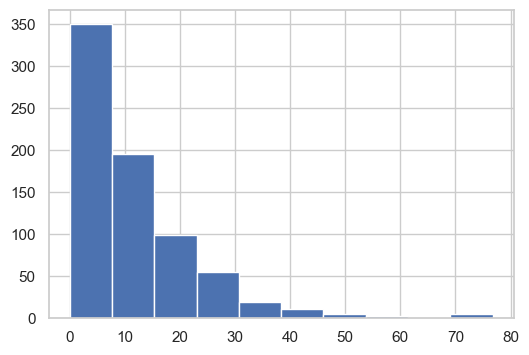

In [12]:
df['Estimated Unemployment Rate (%)'].hist()

## Descriptive Statistics

In [13]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
            Region  Estimated Unemployment Rate (%)  Estimated Employed  \
count  740.000000                       740.000000        7.400000e+02   
mean    11.796940                        11.787946        7.204460e+06   
std      4.225814                        10.721298        8.087988e+06   
min      7.117943                         0.000000        4.942000e+04   
25%      8.764811                         4.657500        1.190404e+06   
50%     10.060484                         8.350000        4.744178e+06   
75%     14.098183                        15.887500        1.127549e+07   
max     23.215587                        76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)        Area       month  \
count                               740.000000  740.000000  740.000000   
mean                                 42.630122    0.514865    6.390541   
std                                   8.111094    0.500117    3.235070   
min            

## Model Building

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('Estimated Unemployment Rate (%)', axis=1)
y = df['Estimated Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Region,Estimated Employed,Estimated Labour Participation Rate (%),Area,month,year
244,11.955696,6025235.0,45.79,0,6,2019
563,8.764811,6266446.0,37.67,1,7,2019
537,8.260883,8647794.0,39.00,1,9,2019
500,16.446937,232322.0,49.69,1,10,2019
135,17.857689,6958404.0,39.66,0,7,2019


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_params = {
    "Linear Regression": {"model": LinearRegression(), "params": {}},
    "Ridge Regression": {"model": Ridge(), "params": {"alpha": [0.1, 1.0, 10.0]}},
    "Lasso Regression": {"model": Lasso(), "params": {"alpha": [0.001, 0.01, 0.1, 1.0]}},
    "ElasticNet": {"model": ElasticNet(), "params": {"alpha": [0.01, 0.1, 1.0], "l1_ratio": [0.2, 0.5, 0.8]}},
    "Decision Tree": {"model": DecisionTreeRegressor(), "params": {"max_depth": [5, 10, 20]}},
    "Random Forest": {"model": RandomForestRegressor(), "params": {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}},
    "Extra Trees": {"model": ExtraTreesRegressor(), "params": {"n_estimators": [100, 200], "max_depth": [10, 20]}},
    "AdaBoost": {"model": AdaBoostRegressor(), "params": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1, 0.5]}},
    "Gradient Boosting": {"model": GradientBoostingRegressor(), "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}},
    "Support Vector Regressor": {"model": SVR(), "params": {"C": [0.1, 1, 10], "kernel": ["rbf", "linear"]}},
    "KNN Regressor": {"model": KNeighborsRegressor(), "params": {"n_neighbors": [3, 5, 7]}},
    "XGBoost": {"model": XGBRegressor(), "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}},
    "CatBoost": {"model": CatBoostRegressor(verbose=0), "params": {"iterations": [100, 200], "learning_rate": [0.05, 0.1]}},
}

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

results = []

for name, mp in model_params.items():
    model = mp["model"]
    param_grid = mp["params"]

    search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    search.fit(X_train_scaled, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse, search.best_params_))

# Results
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "Best Params"])
print("\nFinal Comparison:")
print(results_df.sort_values(by="R2 Score", ascending=False))


Final Comparison:
                       Model  R2 Score      RMSE  \
12                  CatBoost  0.750943  6.004824   
8          Gradient Boosting  0.747866  6.041803   
7                   AdaBoost  0.697870  6.613745   
11                   XGBoost  0.694235  6.653416   
5              Random Forest  0.691820  6.679639   
6                Extra Trees  0.674446  6.865346   
4              Decision Tree  0.582182  7.777578   
10             KNN Regressor  0.495680  8.544841   
0          Linear Regression  0.472651  8.737752   
3                 ElasticNet  0.470723  8.753714   
1           Ridge Regression  0.468825  8.769393   
2           Lasso Regression  0.464688  8.803483   
9   Support Vector Regressor  0.411683  9.229038   

                                     Best Params  
12     {'iterations': 200, 'learning_rate': 0.1}  
8    {'learning_rate': 0.1, 'n_estimators': 100}  
7    {'learning_rate': 0.1, 'n_estimators': 100}  
11  {'learning_rate': 0.05, 'n_estimators': 100}

In [18]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [19]:
import joblib

joblib.dump(t_encoder, 'models/target_encoder.pkl')
joblib.dump(label_encoder, 'models/label_encoder.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(model, 'models/model.pkl')

['models/model.pkl']

In [20]:
new_data = pd.DataFrame([{
    "Region": "Southern",
    "Estimated Employed": 35.0,
    "Estimated Labour Participation Rate (%)": 40.5,
    "Area": "Urban",
    "month": 5,
    "year": 2020
}])
new_data

,Region,Estimated Employed,Estimated Labour Participation Rate (%),Area,month,year
0,Southern,35.0,40.5,Urban,5,2020


In [21]:
new_data['Area'] = label_encoder.transform(new_data['Area'])
new_data['Region'] = t_encoder.transform(new_data['Region'])
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-0.00601192, -0.90884374, -0.26359117,  0.95054562, -0.42314436,
         1.16557528]])

In [22]:
pred = model.predict(new_data_scaled)[0]
print("Predicted Unemployment Rate:", pred)

Predicted Unemployment Rate: 55.326811927816244


Text(0.5, 1.0, 'Prediction vs Actual (with perfect-fit line)')

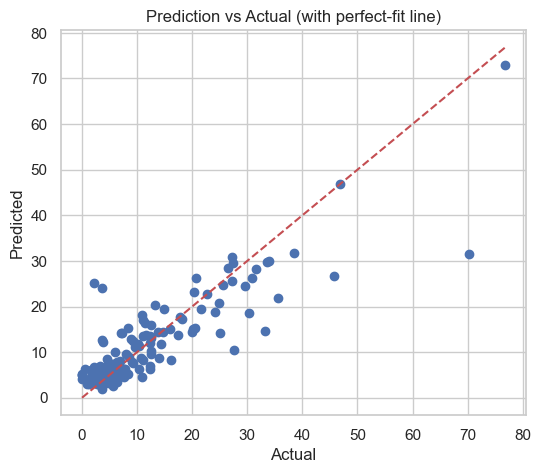

In [23]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual (with perfect-fit line)")